# NeuroMet

### External Modules

In [1]:
import sys, os, glob 
sys.path.append(os.path.abspath('../'))
from neuromet import NeuroMet2_dev_fs7
from neuromet import scanner_to_bids

221004-13:45:22,791 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.6.1


In [2]:
! which recon-all

/opt/freesurfer_7/bin/recon-all


In [3]:
from IPython.display import Image
%matplotlib inline

### Settings

In [4]:
os.getcwd()

'/media/10Tb/NeuroMet_MP2rage_pypes/test'

In [5]:
## Paths
base_dir = os.path.join(os.getcwd(), 'NeuroMET')
temp_dir = os.path.join(os.getcwd(), 'tmp')

#cores
cores = 3
omp_nthreads = 3

# SPM Segment and Mask generation

### Tissue Segmentation Pipeline

In [6]:
subject_list = ['003T1']

In [7]:
neuromet = NeuroMet2_dev_fs7.NeuroMet(sublist = subject_list,
                            temp_dir = temp_dir,
                            bids_root = base_dir,
                            omp_nthreads=3)

In [8]:
neuromet = neuromet.make_neuromet1_workflow()

stty: 'standard input': Inappropriate ioctl for device


221004-13:45:30,461 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/neuromet.png (graph2use=colored, simple_form=True).


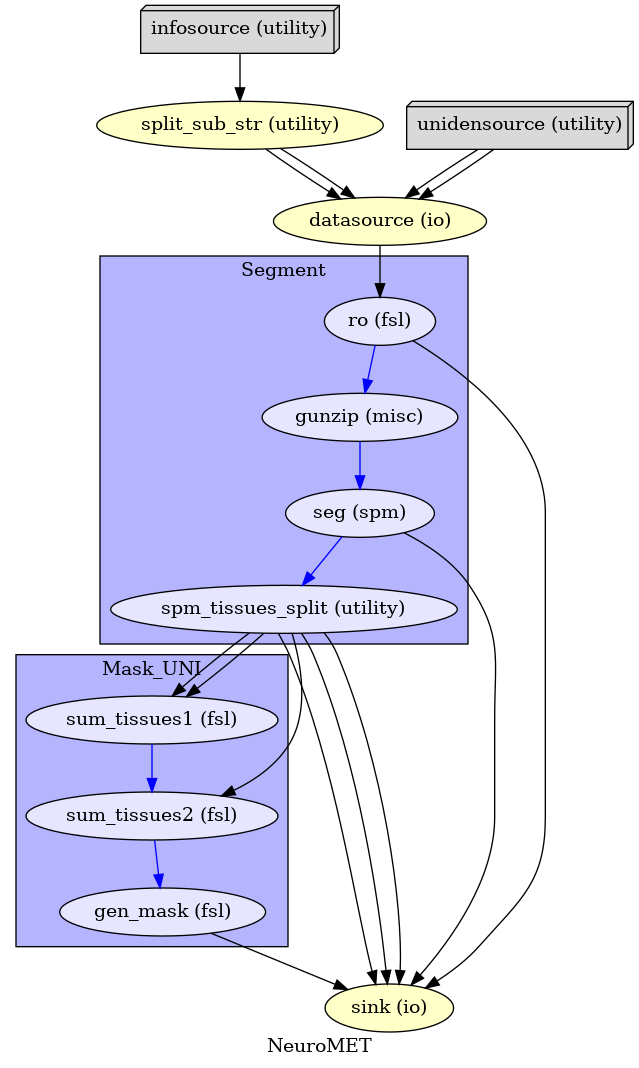

In [9]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet')
Image(filename='./imgs/neuromet.png', width=250)

In [ ]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

221004-13:45:30,478 nipype.workflow INFO:
	 Workflow NeuroMET settings: ['check', 'execution', 'logging', 'monitoring']
221004-13:45:30,495 nipype.workflow INFO:
	 Running in parallel.
221004-13:45:30,497 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 3/3.
221004-13:45:30,550 nipype.workflow INFO:
	 [Job 0] Cached (NeuroMET.split_sub_str).
221004-13:45:32,498 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 3/3.
221004-13:45:32,554 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/media/10Tb/NeuroMet_MP2rage_pypes/test/tmp/NeuroMET/_subject_id_003T1/_uniden_prefix__uniden_suffix_T1w/datasource".
221004-13:45:32,560 nipype.workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
221004-13:45:32,560 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/media/10Tb/NeuroMet_MP2rage_pypes/test

# Combined image and Freesurfer analysis

In [ ]:
print(subject_list)

In [ ]:
#subject_list += ['012T3']
subject_list

In [ ]:
import importlib
importlib.reload(NeuroMet2_dev_fs7)

In [ ]:
neuromet = NeuroMet2_dev_fs7.NeuroMet(sublist = subject_list,
                            raw_data_dir = raw_data_dir,
                            temp_dir = temp_dir,
                            bids_root = base_dir,
                            omp_nthreads=omp_nthreads)
neuromet_fs = neuromet.make_neuromet_fs_workflow()

In [ ]:
neuromet_fs.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet_fs')
Image(filename='./imgs/neuromet_fs.png', width=350)

### Run Freesurfer Analysis

In [ ]:
#from time import sleep
#sleep(12 * 60 *60)

In [ ]:
%%time
neuromet_fs.run('MultiProc', plugin_args={'n_procs': cores})

In [ ]:
# Calculate and Ajust Volumes

In [ ]:
os.getcwd()

In [ ]:
from neuromet.nodes import adj_vol, qdec, qdec2

In [ ]:
import importlib
importlib.reload(qdec)
importlib.reload(qdec2)

In [ ]:
q = qdec.QDec()

In [ ]:
q.inputs.basedir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET_BIDS/NeuroMET/derivatives/NeuroMET_FS'
q.inputs.fs_dir_template = '/*/*.reconall'

In [ ]:
res = q.run()

In [ ]:
res.outputs.stats_directory

In [ ]:
dats = [i for i in os.listdir(res.outputs.stats_directory) if i.endswith('.dat')]

In [ ]:
dats

In [ ]:
for i in dats:
    i = os.path.join(res.outputs.stats_directory, i)
    pd.read_csv(i, sep='\t').to_excel(i.replace('.dat', '.xlsx'))

In [ ]:
import importlib
importlib.reload(adj_vol)

In [ ]:
v = adj_vol.AdjustVolume()

In [ ]:
v.inputs.stats_directory = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/stats_tables'
v.inputs.diag_csv = 